In [1]:
# loading data
import importlib
import load_transform_pipeline #import the module here, so that it can be reloaded.
importlib.reload(load_transform_pipeline)
import pickle
file_path = '../models/data.pkl'
data = pickle.load(open(file_path, 'rb'))

X_train_df = data['X_train_df']
X_test_df = data['X_test_df']
X_val_df = data['X_val_df']

X_train = data['X_train']
X_test = data['X_test']
X_val = data['X_val']

y_train = data['y_train']
y_test = data['y_test']
y_val = data['y_val']

transform_pipeline = data['transform_pipeline']

C:\Users\danto\Anaconda3\envs\IA\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\danto\Anaconda3\envs\IA\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\danto\Anaconda3\envs\IA\lib\site-packages\sklearn\base.py:313: UserWarning: Trying to unpickle estimator S

In [67]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', num_leaves=5,
                              learning_rate=0.05, n_estimators=100,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.25,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    


In [68]:
model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

[0]	validation_0-rmse:135.97813
[1]	validation_0-rmse:130.45828
[2]	validation_0-rmse:125.27110
[3]	validation_0-rmse:120.41238
[4]	validation_0-rmse:115.81680
[5]	validation_0-rmse:111.51576
[6]	validation_0-rmse:107.46510
[7]	validation_0-rmse:103.66599
[8]	validation_0-rmse:100.13047
[9]	validation_0-rmse:96.80293
[10]	validation_0-rmse:93.69743
[11]	validation_0-rmse:90.79336
[12]	validation_0-rmse:88.06570
[13]	validation_0-rmse:85.53991
[14]	validation_0-rmse:83.19568
[15]	validation_0-rmse:80.96639
[16]	validation_0-rmse:78.87931
[17]	validation_0-rmse:76.94424
[18]	validation_0-rmse:75.14011
[19]	validation_0-rmse:73.48910
[20]	validation_0-rmse:71.93495
[21]	validation_0-rmse:70.53005
[22]	validation_0-rmse:69.20031
[23]	validation_0-rmse:67.95776
[24]	validation_0-rmse:66.81397
[25]	validation_0-rmse:65.75306
[26]	validation_0-rmse:64.79791
[27]	validation_0-rmse:63.91756
[28]	validation_0-rmse:63.08761
[29]	validation_0-rmse:62.30452
[30]	validation_0-rmse:61.57978
[31]	vali

XGBRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
             base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, feature_fraction=0.25,
             feature_fraction_seed=9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_bin=55, max_delta_step=0, max_depth=6,
             min_child_weight=1, min_data_in_leaf=6, min_sum_hessian_in_leaf=11,
             missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_leaves=5, num_parallel_tree=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0, ...)

In [81]:
from sklearn.metrics import r2_score

y_train_predicted = model.predict(X_train)
print('train:', r2_score(y_train, y_train_predicted))

train: 0.6888823074679271


In [82]:
y_test_predicted = model.predict(X_test)
print('test:', r2_score(y_test, y_test_predicted))

test: 0.5818318190687422


In [86]:
y_val_predicted = model.predict(X_val)
print('Validation:', r2_score(y_val, y_val_predicted))

Validation: 0.5871482663117494


In [72]:
import numpy as np
r2_test=[]
r2_train=[]
for i in range (1,100,5):
    
    model = xgb.XGBRegressor(objective='reg:squarederror',num_leaves=5,
                              learning_rate=0.05, n_estimators=i,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.25,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    
    model.fit(X_train, y_train ,eval_set=[(X_val, y_val)])
    
    
    y_pred=model.predict(X_test)
    cal_rmse=r2_score(y_test,y_pred)
    np.array(r2_test.append(cal_rmse))

    y_pred_train=model.predict(X_train)
    train_rmse=r2_score(y_train,y_pred_train)
    np.array(r2_train.append(train_rmse))


[0]	validation_0-rmse:135.97813
[0]	validation_0-rmse:135.97813
[1]	validation_0-rmse:130.45828
[2]	validation_0-rmse:125.27110
[3]	validation_0-rmse:120.41238
[4]	validation_0-rmse:115.81680
[5]	validation_0-rmse:111.51576
[0]	validation_0-rmse:135.97813
[1]	validation_0-rmse:130.45828
[2]	validation_0-rmse:125.27110
[3]	validation_0-rmse:120.41238
[4]	validation_0-rmse:115.81680
[5]	validation_0-rmse:111.51576
[6]	validation_0-rmse:107.46510
[7]	validation_0-rmse:103.66599
[8]	validation_0-rmse:100.13047
[9]	validation_0-rmse:96.80293
[10]	validation_0-rmse:93.69743
[0]	validation_0-rmse:135.97813
[1]	validation_0-rmse:130.45828
[2]	validation_0-rmse:125.27110
[3]	validation_0-rmse:120.41238
[4]	validation_0-rmse:115.81680
[5]	validation_0-rmse:111.51576
[6]	validation_0-rmse:107.46510
[7]	validation_0-rmse:103.66599
[8]	validation_0-rmse:100.13047
[9]	validation_0-rmse:96.80293
[10]	validation_0-rmse:93.69743
[11]	validation_0-rmse:90.79336
[12]	validation_0-rmse:88.06570
[13]	valid

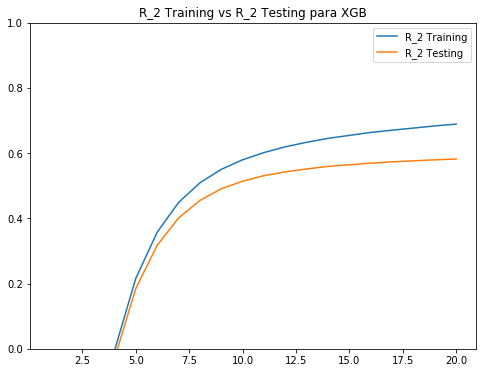

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(8,6))
plt.plot(range(1,21,1), r2_train, label='R_2 Training')
plt.plot(range(1,21,1), r2_test, label='R_2 Testing')
plt.ylim((0, 1))
plt.legend(loc="best")
plt.title("R_2 Training vs R_2 Testing para XGB")
plt.show()

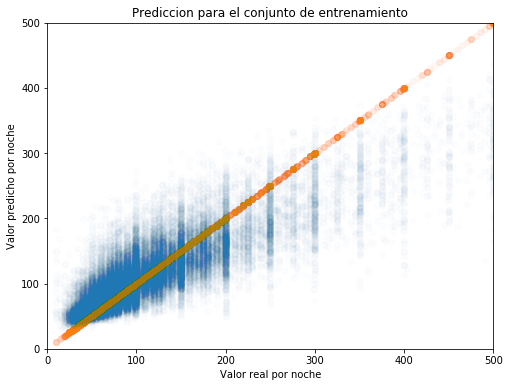

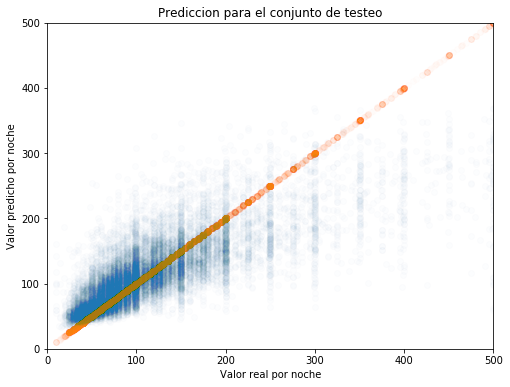

In [79]:
lims = (0, 500)
alpha = .01

plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_predicted, alpha=alpha)
plt.scatter(y_train, y_train, alpha=alpha)
plt.xlabel('Valor real por noche')
plt.ylabel('Valor predicho por noche')
plt.xlim(lims)
plt.ylim(lims)
plt.title("Prediccion para el conjunto de entrenamiento")
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_predicted, alpha=alpha)
plt.scatter(y_test, y_test, alpha=alpha)
plt.xlabel('Valor real por noche')
plt.ylabel('Valor predicho por noche')
plt.xlim(lims)
plt.ylim(lims)
plt.title("Prediccion para el conjunto de testeo")
plt.show()